In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("Italy-covid-daywise.csv")

# retrieve the number of rows and columns in the data frame

In [27]:
num_rows=df.shape[0]
num_cols=df.shape[1]
print(f"number of rows={num_rows},number of columns={num_cols}")

number of rows=248,number of columns=4


# view statistical information for numerical columns

In [28]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


# view some basic information about the data frame like data types, and number of non-nulls



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


# create a list of columns within the data frame


In [30]:
columns_list=df.columns.tolist()
print('list of features ',columns_list)

list of features  ['date', 'new_cases', 'new_deaths', 'new_tests']


# return only the days which had more than 1000 reported cases

In [31]:
high_cases=df.loc[df['new_cases']>1000,'date']
print('the days which had more than 1000 reported cases\n',high_cases)

the days which had more than 1000 reported cases
 68     2020-03-08
69     2020-03-09
70     2020-03-10
72     2020-03-12
73     2020-03-13
          ...    
241    2020-08-28
242    2020-08-29
243    2020-08-30
244    2020-08-31
247    2020-09-03
Name: date, Length: 72, dtype: object


# create positive_rate column that is equal to new_cases / new_tests

In [32]:
df['positive_rate']=df['new_cases'] / df['new_tests']

In [33]:
df.tail(10)

,date,new_cases,new_deaths,new_tests,positive_rate
238,2020-08-25,953.0,4.0,45798.0,0.020809
239,2020-08-26,876.0,4.0,58054.0,0.015089
240,2020-08-27,1366.0,13.0,57640.0,0.023699
241,2020-08-28,1409.0,5.0,65135.0,0.021632
242,2020-08-29,1460.0,9.0,64294.0,0.022708
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN
247,2020-09-03,1326.0,6.0,NaN,NaN


# let's remove the positive_rate column

In [34]:
df=df.drop(columns=['positive_rate'])

# sort to identify the days with the highest number of cases

In [35]:
df['new_cases']=df['new_cases'].replace(-148.0, 148.0)

In [36]:
sort_highest_cases=df.sort_values('new_cases',ascending=False)
print(sort_highest_cases)

          date  new_cases  new_deaths  new_tests
82  2020-03-22     6557.0       795.0        NaN
87  2020-03-27     6153.0       660.0        NaN
81  2020-03-21     5986.0       625.0        NaN
89  2020-03-29     5974.0       887.0        NaN
88  2020-03-28     5959.0       971.0        NaN
..         ...        ...         ...        ...
28  2020-01-28        0.0         0.0        NaN
30  2020-01-30        0.0         0.0        NaN
32  2020-02-01        0.0         0.0        NaN
33  2020-02-02        0.0         0.0        NaN
0   2019-12-31        0.0         0.0        NaN

[248 rows x 4 columns]


# check the data type of date column, then convert it into a datetime

In [37]:
df['date'].dtype

dtype('O')

In [38]:
df['date']=pd.to_datetime(df['date'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


# extract different parts(day, month, weekday, and year) of the date column into separate columns

In [40]:
df['day']=df['date'].dt.day

In [41]:
df['month']=df['date'].dt.month

In [42]:
df['weekday']=df['date'].dt.weekday

In [43]:
df['year']=df['date'].dt.year

In [44]:
df.tail(10)

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
238,2020-08-25,953.0,4.0,45798.0,25,8,1,2020
239,2020-08-26,876.0,4.0,58054.0,26,8,2,2020
240,2020-08-27,1366.0,13.0,57640.0,27,8,3,2020
241,2020-08-28,1409.0,5.0,65135.0,28,8,4,2020
242,2020-08-29,1460.0,9.0,64294.0,29,8,5,2020
243,2020-08-30,1444.0,1.0,53541.0,30,8,6,2020
244,2020-08-31,1365.0,4.0,42583.0,31,8,0,2020
245,2020-09-01,996.0,6.0,54395.0,1,9,1,2020
246,2020-09-02,975.0,8.0,NaN,2,9,2,2020
247,2020-09-03,1326.0,6.0,NaN,3,9,3,2020


# check the overall metrics for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')

In [45]:
May=df[df['month']==5]
print('sum of new cases in may= ',May['new_cases'].sum(),'\nsum of new deaths in may=', May['new_deaths'].sum(),
'\nsum of new tests in may= ',May['new_tests'].sum())

sum of new cases in may=  29073.0 
sum of new deaths in may= 5658.0 
sum of new tests in may=  1078720.0


# which day seems like have more cases?

In [46]:
most_day_cases=df.loc[df['new_cases'].idxmax(),'date']
print("the heighest day had new cases= ",most_day_cases)

the heighest day had new cases=  2020-03-22 00:00:00


# create a new dataframe with month-wise data

In [47]:
month_wise_data=df.groupby(df['month']).sum()
print('month wise data:\n',month_wise_data.drop(columns=['day','weekday','year']))

month wise data:
        new_cases  new_deaths  new_tests
month                                  
1            3.0         0.0        0.0
2          885.0        21.0        0.0
3       100851.0     11570.0        0.0
4       101852.0     16091.0   419591.0
5        29073.0      5658.0  1078720.0
6         8068.0      1404.0   830354.0
7         6722.0       388.0   797692.0
8        21060.0       345.0  1098704.0
9         3297.0        20.0    54395.0
12           0.0         0.0        0.0


# plot a line graph showing how the number of daily cases varies over time

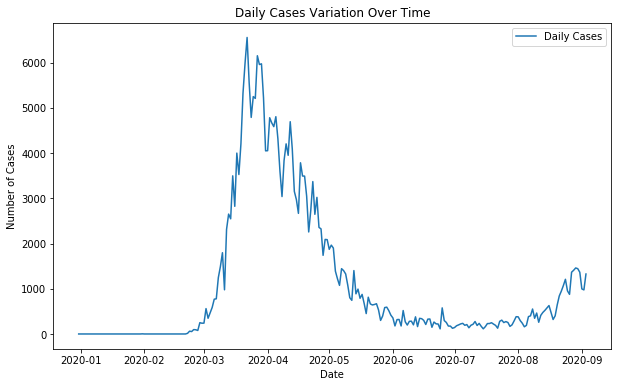

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['new_cases'], label='Daily Cases')
plt.title('Daily Cases Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()